### Modeling Exercises

1. Use the iris dataset.

    - Perform clustering with sepal length, sepal width, and petal length.
    - Use a k of 4.
    - Create a 3d visualization that shows your clusters along with the features specified above?
    - Is 4 the optimal number? Try different values of k and visualize your results.


2. Use the mall dataset.

    - Perform clustering using annual income and spending score. Try out different values for k.
    - Use the resulting clusters to explore your data. What is the center point for each cluster in terms of annual - income and spending score? What is the average age for each cluster?
    - Create a 3d plot with annual income, spending score, and age. Use color to distinguish the clusters you have created.


3. Load the tips dataset

    - Perform k-means clustering with tip and total_bill. Try a k of 2 and a k of 3. Visualize the resulting clusters.
    - Create a 3d visualization of tip, total bill, and party size. Use color to indicate the clusters you have created.
    - Use the resulting clusters to explore your dataset. What is the average party size for each cluster? How many smokers vs non smokers are in each cluster? Is this different than in the overall population?

### Iris Dataset

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
input_features = ['sepal_length', 'sepal_width', 'petal_length']
input_features

['sepal_length', 'sepal_width', 'petal_length']

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(df[input_features])
df['cluster'] = kmeans.predict(df[input_features])

df_clustered = pd.DataFrame(kmeans.cluster_centers_, columns=input_features)

In [21]:
df.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,6.292000,2.898000,4.940000,1.726000
1,5.006000,3.428000,1.462000,0.246000
2,5.532143,2.635714,3.960714,1.228571
3,7.122727,3.113636,6.031818,2.131818


In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [24]:
df_clustered

,sepal_length,sepal_width,petal_length
0,7.122727,3.113636,6.031818
1,5.006000,3.428000,1.462000
2,6.292000,2.898000,4.940000
3,5.532143,2.635714,3.960714


In [25]:
from mpl_toolkits.mplot3d import Axes3D

In [31]:
len(kmeans.labels_)

150

<IPython.core.display.Javascript object>


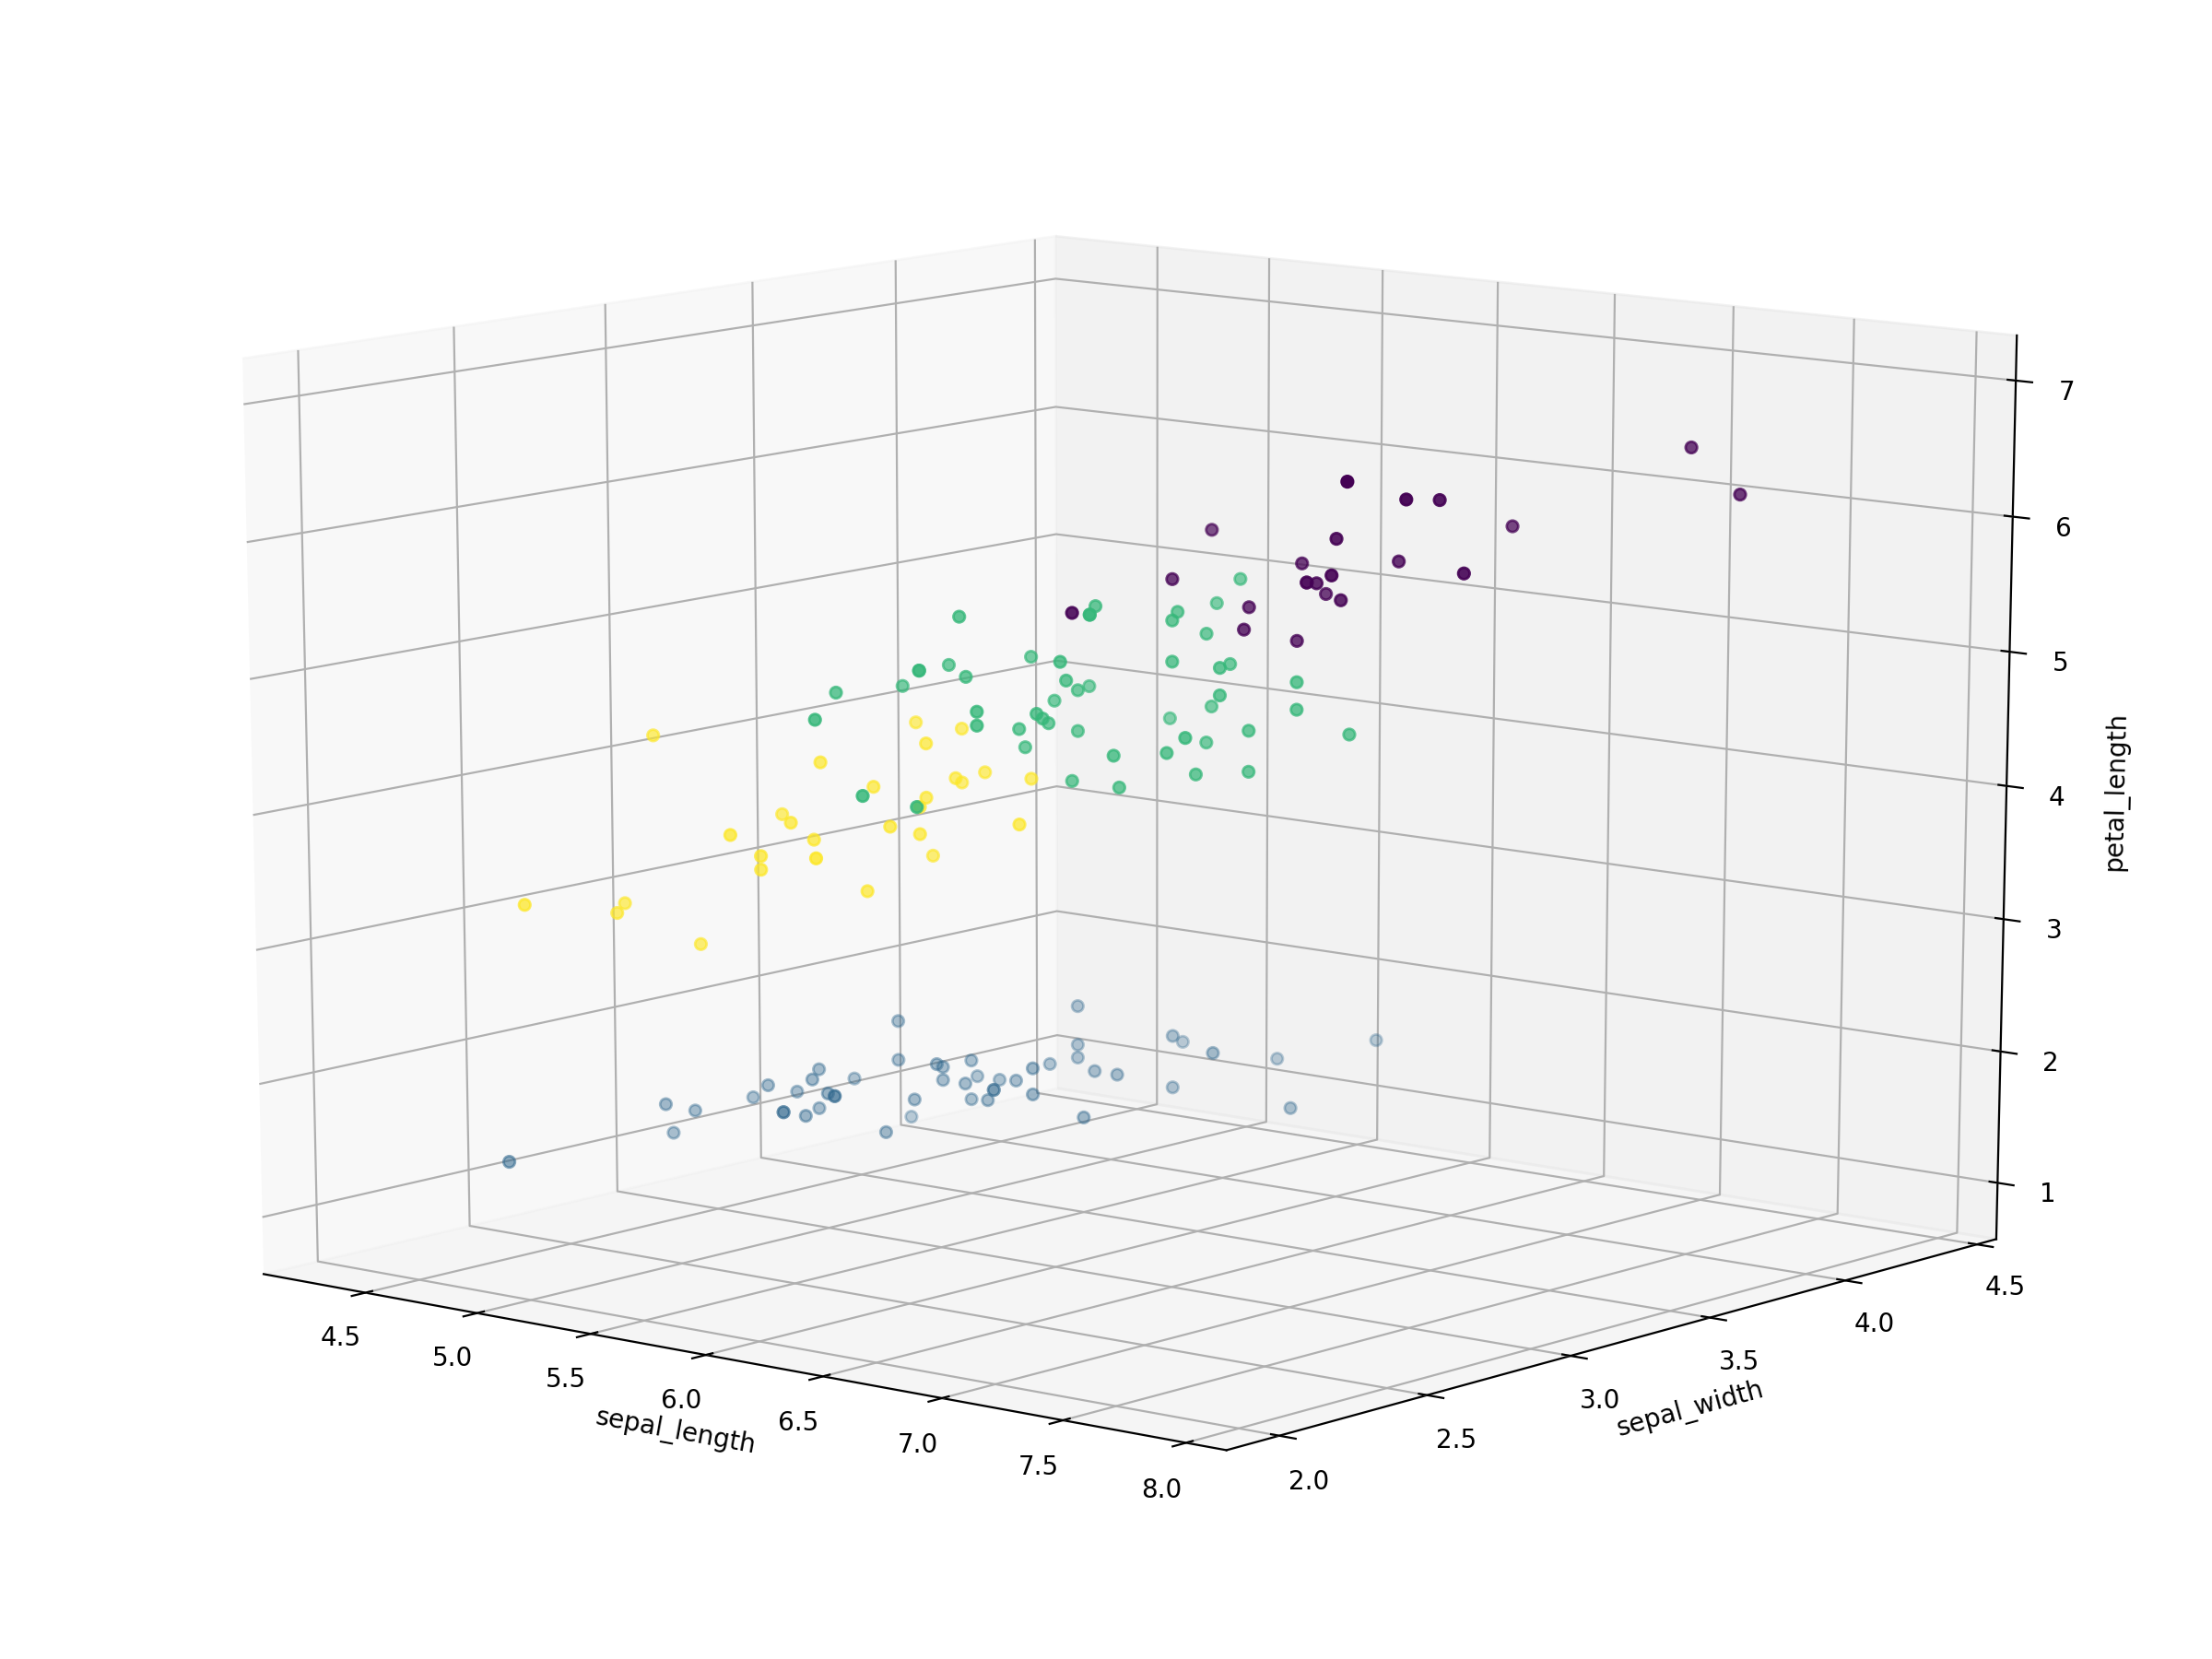

[Text(0.5, 0, 'petal_length'),
 Text(0.5, 0, 'sepal_width'),
 Text(0.5, 0, 'sepal_length')]

In [33]:
%matplotlib notebook

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(df.sepal_length, df.sepal_width, df.petal_length, c=kmeans.labels_)
# ax.scatter(centers.sepal_length, centers.petal_length, centers.petal_width, c='pink', s=10000, alpha=.4)
ax.set(xlabel='sepal_length', ylabel='sepal_width', zlabel='petal_length')

### Mall Dataset

In [7]:
import wrangle_mall
df = wrangle_mall.get_mall_data()
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Tips Dataset

In [1]:
from pydataset import data

In [4]:
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
